In [43]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import IPythonConsole

import sys
sys.path.insert(0, '/home/misa/git_repositories/APDFT/prototyping/atomic_energies/')

import utils_qm as uqm

def GetTotNumAtoms(mol):
    total_num_atoms = 0
    for atom in mol.GetAtoms():
        total_num_atoms += atom.GetTotalNumHs() + 1
    return(total_num_atoms)

In [50]:
amons_database = pd.read_pickle('/home/misa/datasets/amons_qm9_11k/amons_database.pd')

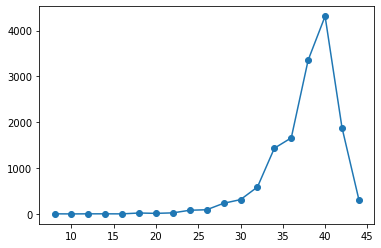

In [51]:
num_ve_dist = []
for i in np.arange(np.amin(amons_database['num_ve']), np.amax(amons_database['num_ve'])+2, 2):
    num_ve_dist.append(len(amons_database.loc[amons_database['num_ve'] == i]))
    
plt.plot(np.arange(np.amin(amons_database['num_ve']), np.amax(amons_database['num_ve'])+2, 2), num_ve_dist, '-o')

In [59]:
smiles_up_to_30_ve = list(amons_database.loc[amons_database['num_ve'] < 32, 'smiles'])

with open('/home/misa/projects/Atomic-Energies/data/ueg_reference/amons/batch1_up_to_30_ve.txt', 'w') as f:
    for s in smiles_up_to_30:
        f.write(s+'\n')

# Make Amons database

In [49]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import IPythonConsole

import sys
sys.path.insert(0, '/home/misa/git_repositories/APDFT/prototyping/atomic_energies/')

import utils_qm as uqm

def GetTotNumAtoms(mol):
    total_num_atoms = 0
    for atom in mol.GetAtoms():
        total_num_atoms += atom.GetTotalNumHs() + 1
    return(total_num_atoms)

amons_dict = uqm.load_obj('/home/misa/datasets/amons_qm9_11k/unique_amons_dict')
amons_database = pd.DataFrame(data=amons_dict.keys(), columns=['smiles'])

# add properties

mols = []
num_ve = []
num_atoms = []

for s in amons_database['smiles']:
    mol = Chem.MolFromSmiles(s)
    mols.append(mol)
    
    num_ve_mol = Descriptors.NumValenceElectrons(mol) # num valence electrons
    num_ve.append(num_ve_mol)
    
    num_atoms_mol = GetTotNumAtoms(mol) # total num atoms
    num_atoms.append(num_atoms_mol)
    
amons_database['num_ve'] = num_ve
amons_database['num_atoms'] = num_atoms

amons_database.to_pickle('/home/misa/datasets/amons_qm9_11k/amons_database.pd')